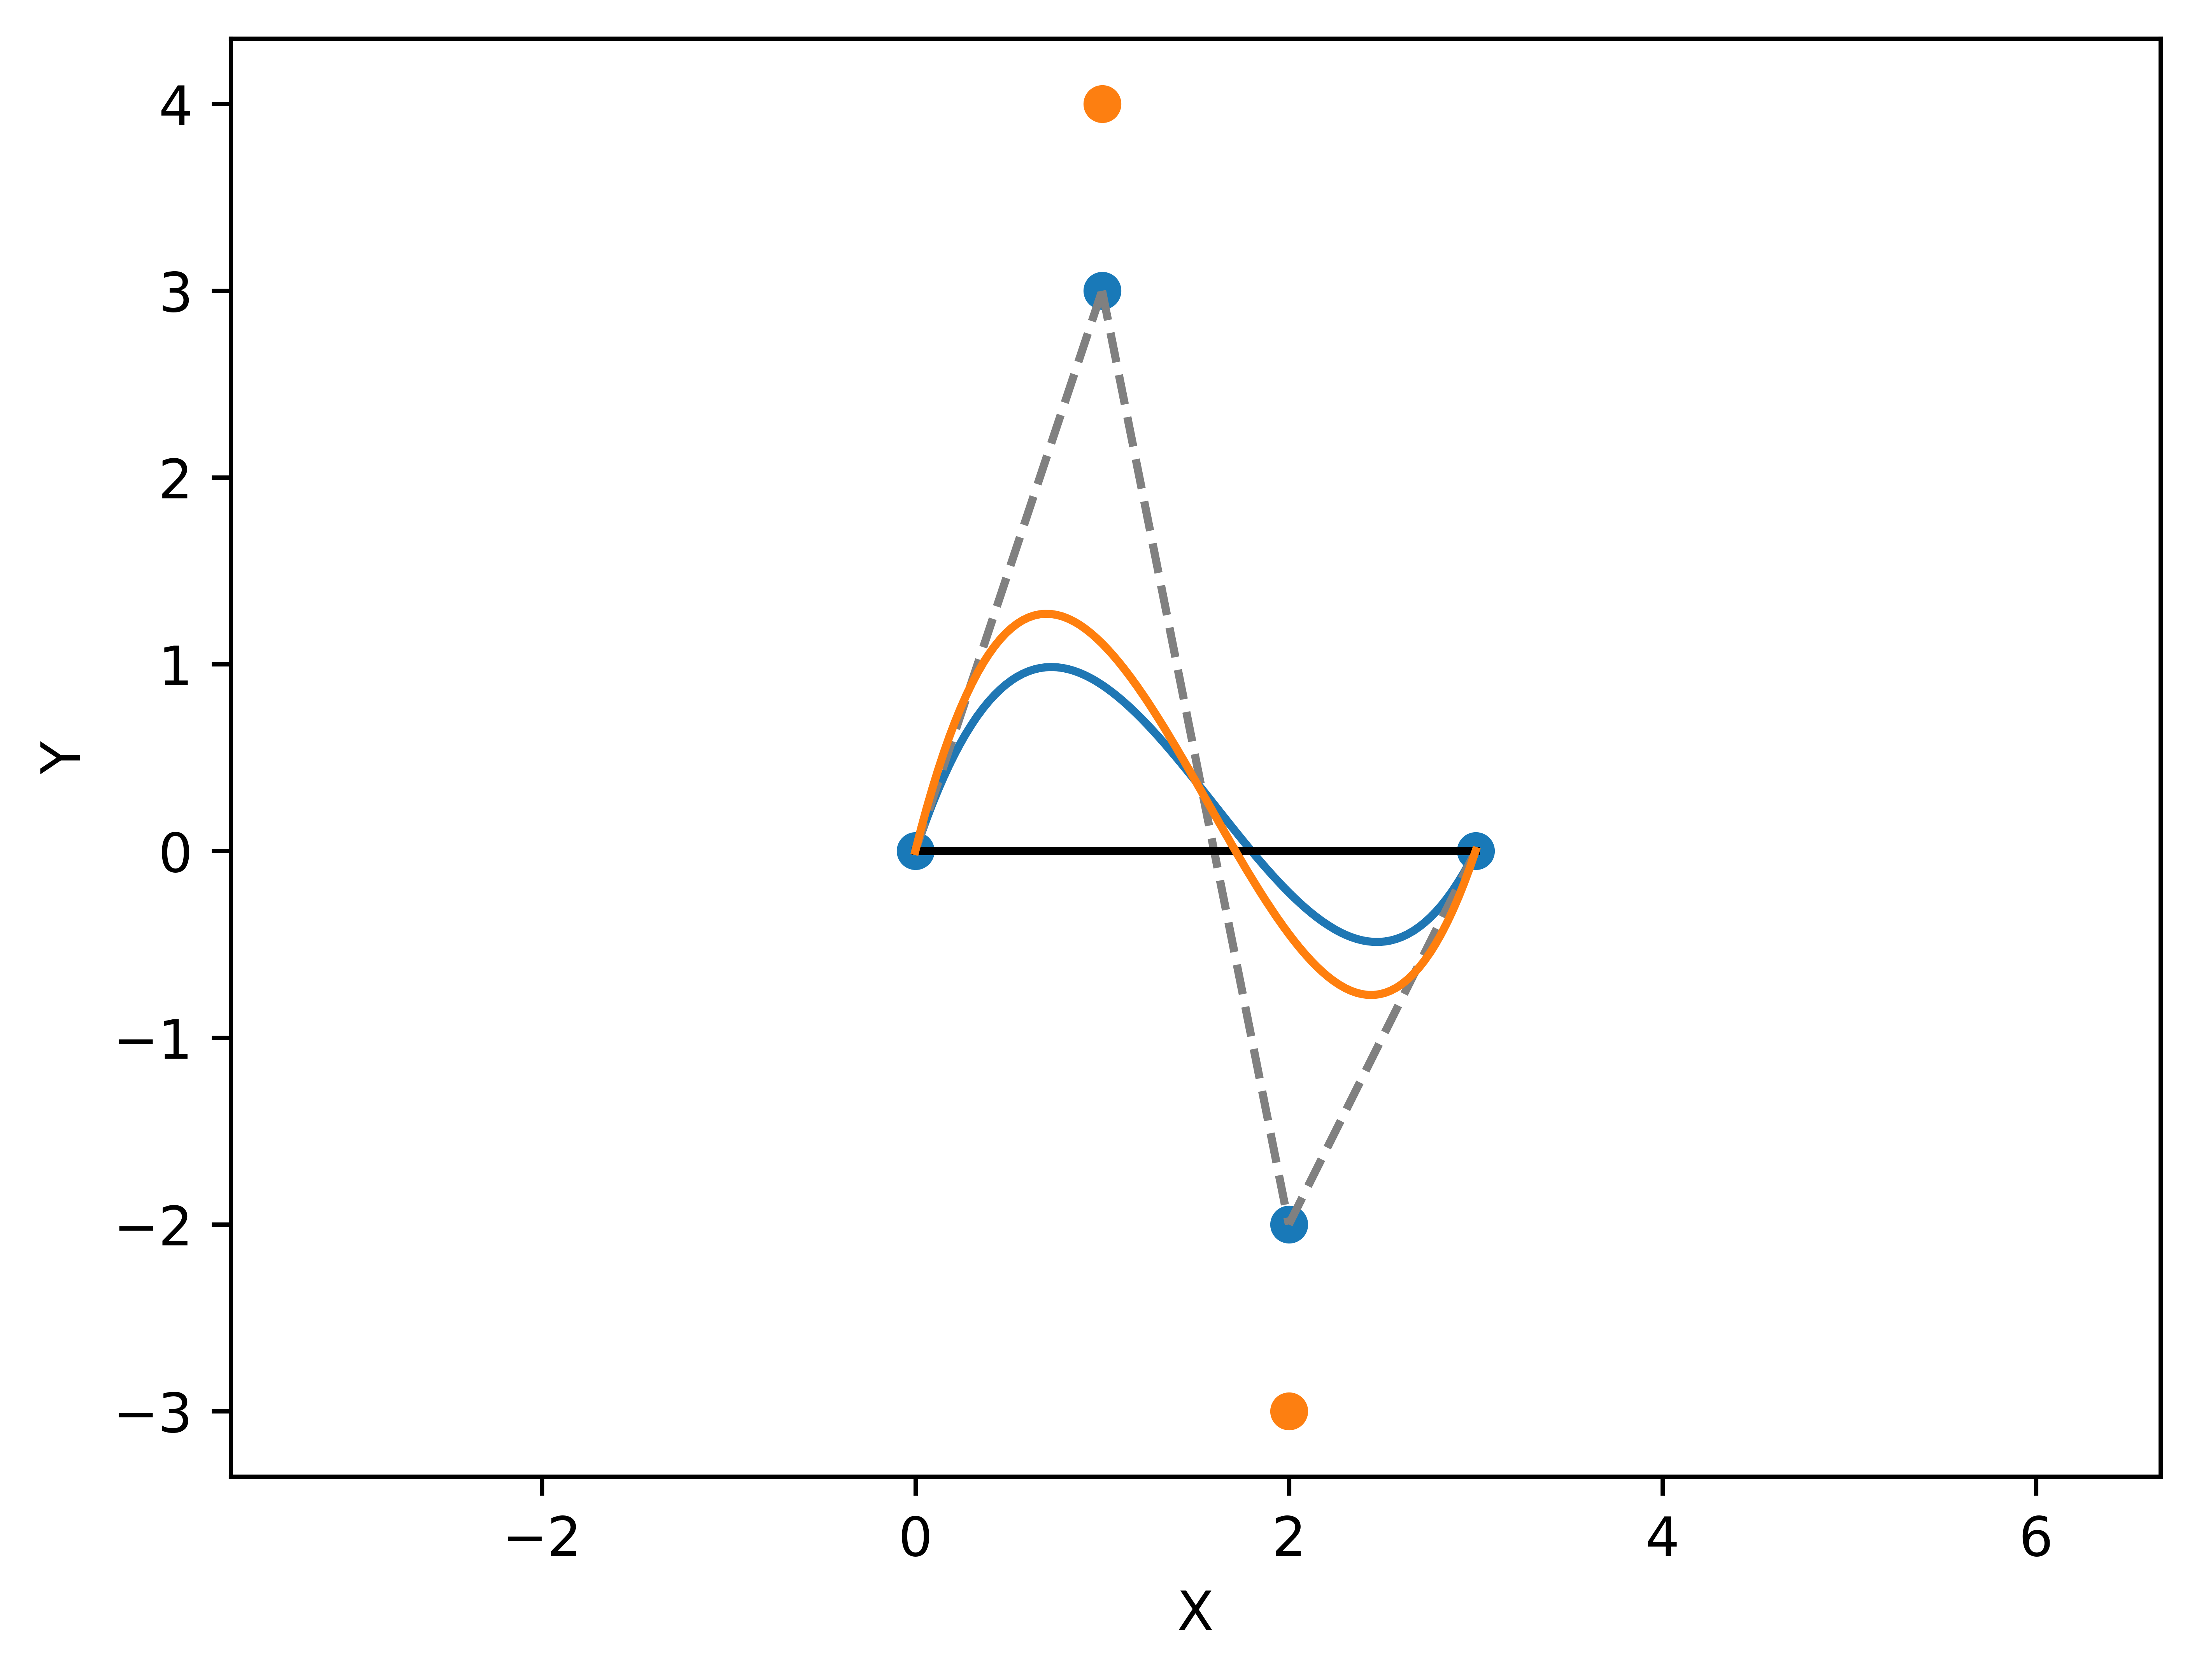

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/braydennoh/Downloads/')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
mpl.rcParams['figure.dpi'] = 1000

import numpy as np
import matplotlib.pyplot as plt

def bezier_curve(control_points, t):
    n = len(control_points) - 1
    result = np.zeros_like(control_points[0], dtype=float)
    for i in range(n + 1):
        result += control_points[i] * comb(n, i) * t**i * (1 - t)**(n - i)
    return result

def comb(n, k):
    return np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))

def perpendicular_line(p1, p2):
    midpoint = (p1 + p2) / 2
    direction = p2 - p1
    perp_direction = np.array([-direction[1], direction[0]])
    perp_direction /= np.linalg.norm(perp_direction)
    return midpoint, perp_direction

# Define the control points for the Bezier curve
control_points = np.array([[0,0], 
                           [1,3], 
                           [2,-2], 
                           [3,0]], dtype=float)

# Generate points along the Bezier curve
t_values = np.linspace(0, 1, 100)
curve_points = np.array([bezier_curve(control_points, t) for t in t_values])

# Plot the Bezier curve
plt.plot(curve_points[:, 0], curve_points[:, 1])
plt.scatter(control_points[:, 0], control_points[:, 1], color='#1979b8')

# Connect the control points with lines
for i in range(len(control_points) - 1):
    plt.plot([control_points[i, 0], control_points[i+1, 0]], [control_points[i, 1], control_points[i+1, 1]], color='gray', linestyle='--')

# Connect the first and last control points with a solid line
plt.plot([control_points[0, 0], control_points[-1, 0]], [control_points[0, 1], control_points[-1, 1]], color='black')

# Draw perpendicular lines from each control point to the connecting line
first_point = control_points[0]
last_point = control_points[-1]
connecting_line = last_point - first_point

updated_control_points = []
for point in control_points[1:-1]:
    # Compute the perpendicular line and distance to move the red dot
    midpoint, perp_direction = perpendicular_line(first_point, last_point)
    distance = 1
    if point[1] < control_points[0, 1]:
        distance *= -1
        
    # Compute the new position of the red dot
    red_dot = point + distance * perp_direction
    
    # Update the control point
    updated_control_points.append(red_dot)

# Plot the updated red dots
updated_control_points = np.array(updated_control_points)
plt.scatter(updated_control_points[:, 0], updated_control_points[:, 1], color='#fd7f11')

# Generate points along the updated Bezier curve
updated_curve_points = np.array([bezier_curve(np.concatenate(([control_points[0]], updated_control_points, [control_points[-1]])), t) for t in t_values])

# Plot the updated Bezier curve
plt.plot(updated_curve_points[:, 0], updated_curve_points[:, 1])

plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()